In [1]:

#from imutils import contours
#!pip install -q cv2
from skimage import measure
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import pickle
import os
from PIL import Image
from os import listdir

In [2]:
#file1=open('file1.txt','r')
#file2=open('file2.txt','r')
#obj=[file1.read(), file2.read()]
#cPickle.dump(obj,open('result.i2','w'),2)
df = pd.read_pickle("ash2.pkl")
print(df['Finger'][35])
neural_ip = np.zeros((405))

35    Right Index
35    Right Index
35    Right Index
35    Right Index
35    Right Index
35    Right Index
35    Right Index
35    Right Index
35    Right Index
35    Right Index
35    Right Index
35    Right Index
35    Right Index
35    Right Index
35    Right Index
35    Right Thumb
35    Right Thumb
35    Right Thumb
35    Right Thumb
35    Right Thumb
35    Right Thumb
35    Right Thumb
35    Right Thumb
35    Right Thumb
35    Right Thumb
35    Right Thumb
35    Right Thumb
35    Right Thumb
35    Right Thumb
35    Right Thumb
         ...     
35    Right Thumb
35    Right Thumb
35    Right Thumb
35    Right Thumb
35    Right Thumb
35    Right Thumb
35    Right Thumb
35    Right Thumb
35    Right Thumb
35    Right Thumb
35    Right Thumb
35    Right Thumb
35    Right Thumb
35    Right Thumb
35    Right Thumb
35    Right Thumb
35    Right Thumb
35    Right Thumb
35    Right Thumb
35    Right Thumb
35    Right Thumb
35    Right Thumb
35    Right Thumb
35    Right Thumb
35    Righ

In [3]:
input_array = []
aray2 = []
neural_ip = []
for index,row in df.iterrows():
    #x[x<10] = 0
    #if(index > 100):
    #    break
    x = row['array']
    x = np.fromstring(x[1:-1], sep=",")
    b = np.asarray(x).reshape(27,15)
    thresh = cv2.threshold(b, 10, 255, cv2.THRESH_BINARY)[1]
    labels = measure.label(thresh, neighbors=8, background=0)
    mask = np.zeros(thresh.shape, dtype="uint8")
    for label in np.unique(labels):                
        if label == 0:
            continue 
        labelMask = np.zeros(thresh.shape, dtype="uint8")
        labelMask[labels == label] = 255
        numPixels = cv2.countNonZero(labelMask)
        if numPixels > 5:
            mask = cv2.add(mask, labelMask)
    flat_mat = mask.flatten()
    idx = np.nonzero(flat_mat)
    repl_mat = np.zeros(flat_mat.shape,dtype = "uint8")
    for i in idx:
        repl_mat[idx] = x[idx]
    #neural_ip = np.vstack((neural_ip,repl_mat))
    neural_ip.append(repl_mat)
    
#aray2 = neural_ip[1::]
#print(neural_ip)
aray2 = neural_ip.copy()
print(np.shape(neural_ip))
#plt.imshow(aray2[0].reshape((27,15)),cmap='gray')

#fig = plt.figure()
#for i in range(0,len(aray2)):
#    plt.imshow(aray2[i].reshape((27,15)),cmap='gray')
    #fig.savefig("Img{}.png".format(i))

(30814, 405)


In [4]:
aray2_np = np.asarray(aray2)
aray2 = aray2_np[~np.all(aray2_np == 0,axis = 1)]
print(np.shape(aray2))

(28905, 405)


In [ ]:
print(np.shape(aray2))
rows = np.shape(aray2)[0]/2
cols =np.shape(aray2)[0] - rows
f = plt.figure()
for i, el in enumerate(aray2):
    #moving axis to use plt: i.e [4,100,100] to [100,100,4]
    print()
    #if (i > 10):
    #    break
    array2 = np.moveaxis(aray2[i], 0, -1)
    
    
    plt.subplot(rows,cols, i + 1)
    #plt.imshow(np.reshape(array2,(27,15))) 
    #plt.savefig(('plot{}',i))
    #plt.imsave("iteration{}.png".format(i),np.reshape(array2,(27,15)),cmap='gray')

#plt.show()
f.savefig("plot2.pdf")
print("done")

(28905, 405)





























































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































KeyboardInterrupt: 

[[  0   0   0   0   0   0   0   0   0   0   0  12   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  52  41   0   0]
 [  0   0   0   0   0   0   0   0   0   0  58 184 178  15   0]
 [  0   0   0   0   0   0   0   0   0   0 119 197 201  38   0]
 [  0   0   0   0   0   0   0   0   0   0 111 198 186  21   0]
 [  0   0   0   0   0   0   0   0   0   0  71 203 124   0   0]
 [  0   0   0   0   0   0   0   0   0   0  23  75  27   0   0]
 [  0   0   0   0   0   0   0   0   0   0  15  26   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  16   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  13  27  21   0   0]
 [  0   0   0   0   0   0   0   0   0   0  13  21  16   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  15   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  15  31  24   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  18  13   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  18  15   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  

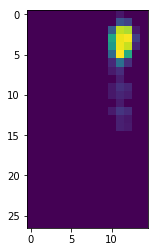

In [16]:
print(aray2[36].reshape(27,15))
plt.imshow(np.reshape(aray2[36],(27,15)))